<a href="https://colab.research.google.com/github/Gabrielnkl/notebooks/blob/tensorflow/possum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abrambeyer/openintro-possum")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/openintro-possum


In [ ]:
import pandas as pd

df = pd.read_csv(f"{path}/possum.csv")
df = df.dropna()
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df = pd.get_dummies(df).astype(float)
df.head()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
0,1.0,1.0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1.0,0.0,0.0,1.0
1,2.0,1.0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1.0,0.0,1.0,0.0
2,3.0,1.0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1.0,0.0,1.0,0.0
3,4.0,1.0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1.0,0.0,1.0,0.0
4,5.0,1.0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1.0,0.0,1.0,0.0


In [ ]:
X = df.drop("age",axis=1)
y = df["age"]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#create a model
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 24.7880 - mae: 4.5330
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 23.9214 - mae: 4.4393
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 23.1322 - mae: 4.3516
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 22.3995 - mae: 4.2689
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 21.7044 - mae: 4.1881
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 21.0476 - mae: 4.1093
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 20.4061 - mae: 4.0302
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 19.7863 - mae: 3.9521
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 19.2051 - mae: 3.8772
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 18.6497 - mae: 3.8060
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 18.1210 - mae: 3.7378
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 17.6394 - mae: 3.6735
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step 

In [ ]:
model.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2554 - mae: 1.5329


[4.599842071533203, 1.620711088180542]

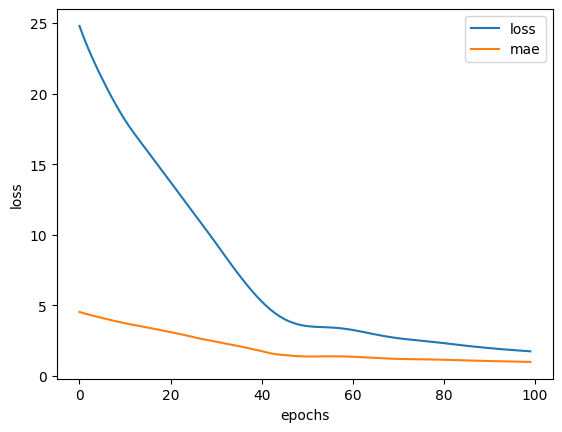

In [ ]:
import matplotlib.pyplot as plt
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


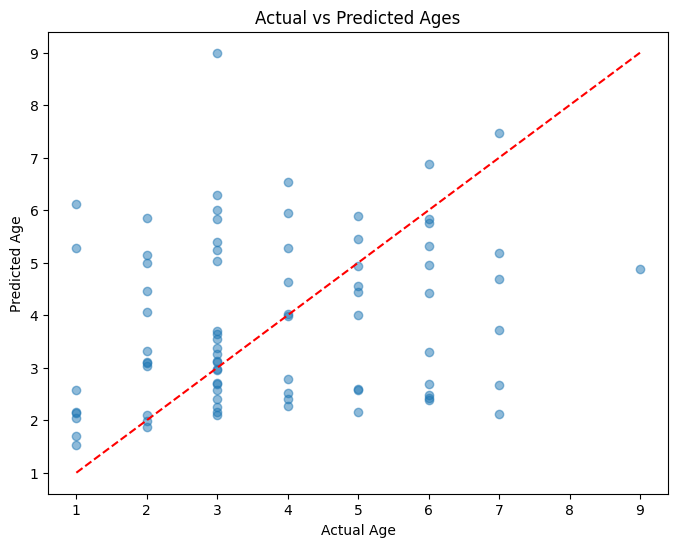

In [ ]:
import matplotlib.pyplot as plt
# Visualize predictions vs actual
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Ages")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()